# **IMPORTING LIBRARIES**

In [1670]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")




# **1.** **Exploratory Data Analysis**

In [1671]:
# Load the dataset
df=pd.read_csv('dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [1672]:
df.shape

(303, 14)

In [1673]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [1674]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [1675]:
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [1676]:
df.duplicated().sum()


np.int64(1)

In [1677]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

# **2. Data Cleaning**

In [1678]:
# Remove duplicate rows from the dataset
df.drop_duplicates(inplace=True)

In [1679]:
# Verify that all duplicate rows have been removed
df.duplicated().sum()

np.int64(0)

# **3. Univariate Analysis**
## Analyze each variable individually to understand its distribution and structure


### **3.1. Target Variable Visualization**

<function matplotlib.pyplot.show(close=None, block=None)>

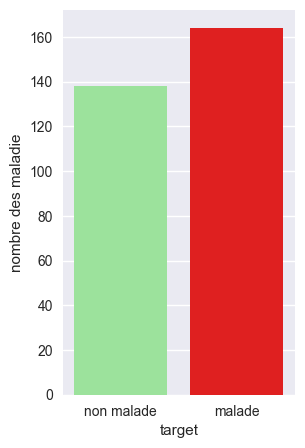

In [1680]:
# Visualization of the target variable (checking if the dataset is balanced)

plt.figure(figsize=(3,5))
sns.countplot(x='target',data=df,palette=['lightgreen','red'])
plt.ylabel('nombre des maladie')
plt.xticks([0,1],['non malade','malade'])
plt.show

# The result shows a relatively balanced distribution between the two classes

### **3.2. Sex Distribution**

<function matplotlib.pyplot.show(close=None, block=None)>

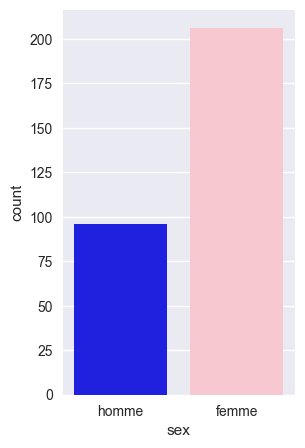

In [1681]:
plt.figure(figsize=(3,5))
sns.countplot(x='sex',data=df,palette=['blue','pink'])
plt.xticks([0,1],['homme','femme'])
plt.show

### **3.3. Fasting Blood Sugar (fbs) Distribution**

<function matplotlib.pyplot.show(close=None, block=None)>

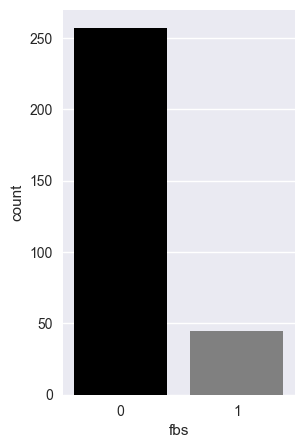

In [1682]:
plt.figure(figsize=(3,5))
sns.countplot(x='fbs',data=df,palette=['black','gray'])
plt.show


### **3.4. Exercise-Induced Angina (exang) Distribution**

<function matplotlib.pyplot.show(close=None, block=None)>

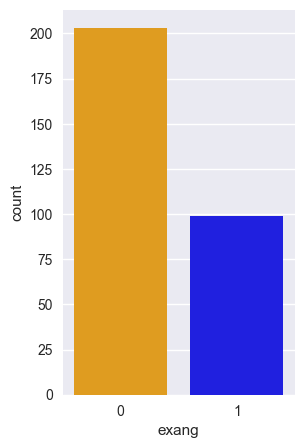

In [1683]:
plt.figure(figsize=(3,5))
sns.countplot(x='exang',data=df,palette=['orange','blue'])
plt.show

### **3.5. Resting Electrocardiographic Results (restecg) Distribution**

<function matplotlib.pyplot.show(close=None, block=None)>

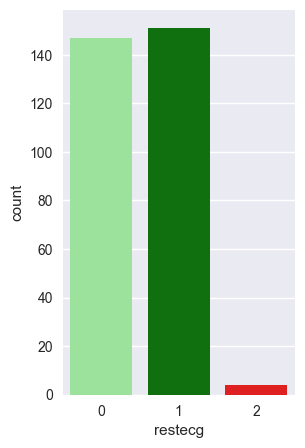

In [1684]:
plt.figure(figsize=(3,5))
sns.countplot(x='restecg',data=df,palette=['lightgreen','green','red'])
plt.show

### **3.6. Slope of the Peak Exercise ST Segment (slope) Distribution**

<function matplotlib.pyplot.show(close=None, block=None)>

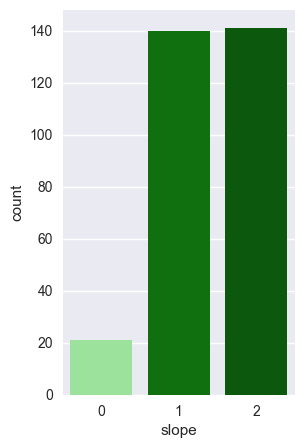

In [1685]:
plt.figure(figsize=(3,5))
sns.countplot(x='slope',data=df,palette=['lightgreen','green','darkgreen'])
plt.show

### **3.7. Number of Major Vessels Colored by Fluoroscopy (ca) Distribution**

<function matplotlib.pyplot.show(close=None, block=None)>

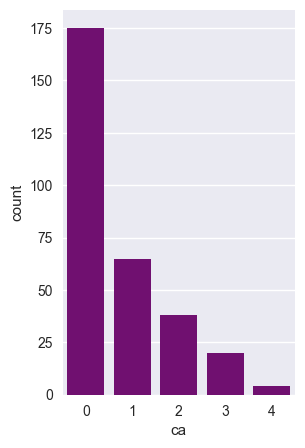

In [1686]:
plt.figure(figsize=(3,5))
sns.countplot(x='ca',data=df,color='purple')
plt.show

### **3.8. Thalassemia (thal) Distribution**
- We remove only the rows where the value of (thal) equals **0**.  
- This category contains only **two occurrences** and provides **no meaningful information**.  
- Such values are likely due to **data entry errors** or **misencoded missing values**.  
- Although some categories are less frequent, they are still **valid and significant**,  
  unlike the value `0`, which should be excluded.

<function matplotlib.pyplot.show(close=None, block=None)>

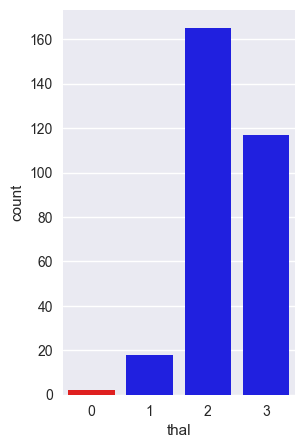

In [1687]:
plt.figure(figsize=(3,5))
sns.countplot(x='thal',data=df,palette=['red','blue','blue','blue'])
plt.show

In [1688]:
# Remove rows where 'thal' value equals 0
df = df[df['thal'] != 0]
# Verify the remaining unique values in the 'thal' column
df['thal'].value_counts()


thal
2    165
3    117
1     18
Name: count, dtype: int64

### **3.9. Age Distribution**

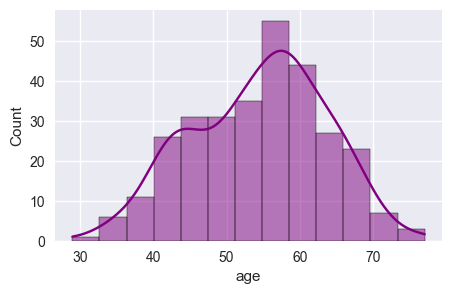

In [1689]:
plt.figure(figsize=(5,3))
sns.histplot(df, x='age', kde=True, color='purple')
plt.show()

# The distribution appears to be approximately normal.


### **3.10. Resting Blood Pressure (trestbps) Distribution**

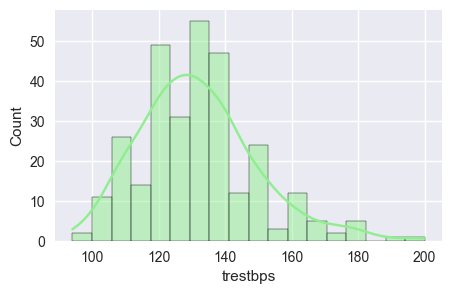

In [1690]:
plt.figure(figsize=(5,3))
sns.histplot(df,
             x='trestbps',
             kde=True,color='lightgreen')
plt.show()
# This feature may contain anomalies or outliers that should be verified.

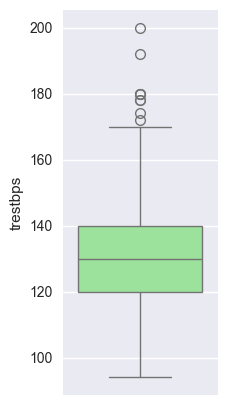

In [1691]:
# Check for potential outliers in the 'trestbps' feature
plt.figure(figsize=(2,5))
sns.boxplot(df,y='trestbps',color='lightgreen')
plt.show()

### **Outlier Removal in Resting Blood Pressure (trestbps)**

In [1692]:
Q1=df['trestbps'].quantile(0.25)
Q3=df['trestbps'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
df=df[(df['trestbps']>=lower)&(df['trestbps']<=upper)]

### **3.11. Serum Cholesterol (chol) Distribution**

<function matplotlib.pyplot.show(close=None, block=None)>

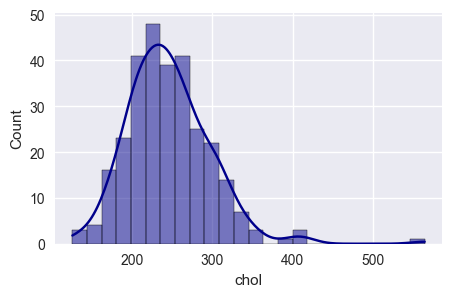

In [1693]:
plt.figure(figsize=(5,3))
sns.histplot(df,x='chol',kde=True,color='darkblue')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

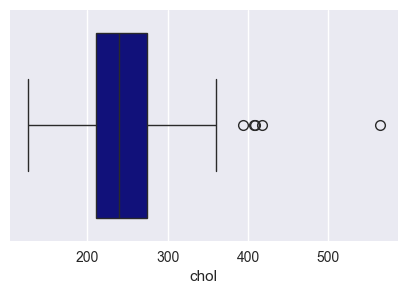

In [1694]:
plt.figure(figsize=(5,3))
sns.boxplot(df,x='chol',color='darkblue')
plt.show

### **Outlier Removal in Serum Cholesterol (chol)**

In [1695]:
Q1=df['chol'].quantile(0.25)
Q3=df['chol'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
df=df[(df['chol']>=lower)&(df['chol']<=upper)]

### **3.12. Maximum Heart Rate Achieved (thalach) Distribution**

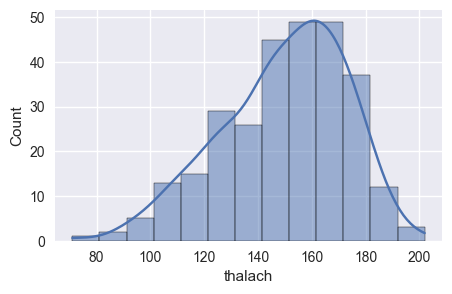

In [1696]:
plt.figure(figsize=(5,3))
sns.histplot(df,x='thalach',kde=True)
plt.show()

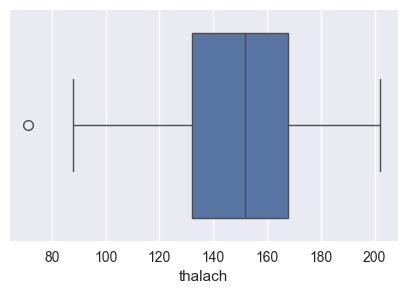

In [1697]:
plt.figure(figsize=(5,3))
sns.boxplot(df,x='thalach')
plt.show()

### **Outlier Removal in Maximum Heart Rate Achieved (thalach)**

In [1698]:
Q1=df['thalach'].quantile(0.25)
Q3=df['thalach'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
df=df[(df['thalach']>=lower)&(df['thalach']<=upper)]

### **3.13. ST Depression Induced by Exercise (oldpeak) Distribution**

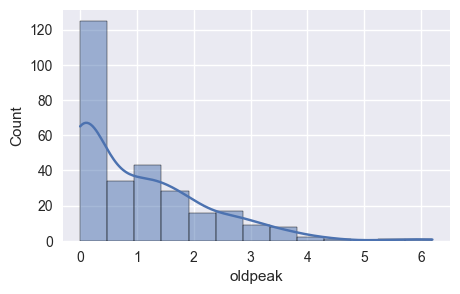

In [1699]:
plt.figure(figsize=(5,3))
sns.histplot(df,x='oldpeak',kde=True)
plt.show()

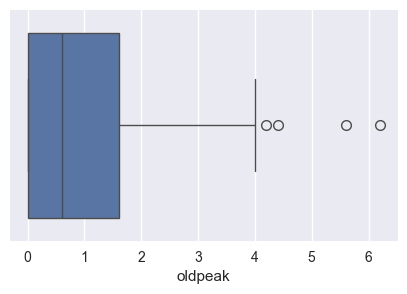

In [1700]:
plt.figure(figsize=(5,3))
sns.boxplot(df,x='oldpeak',)
plt.show()

### **Outlier Removal in ST Depression (oldpeak)**

In [1701]:
Q1=df['oldpeak'].quantile(0.25)
Q3=df['oldpeak'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
df=df[(df['oldpeak']>=lower)&(df['oldpeak']<=upper)]

# **4. Correlation Analysis Between Features (to Avoid Redundancy)**


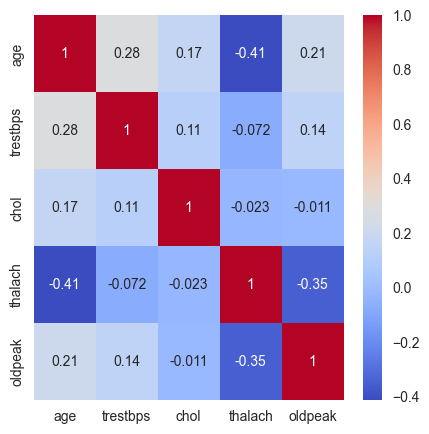

In [1702]:
valeur_numerique=['age','trestbps','chol','thalach','oldpeak']
matrix_corr=df[valeur_numerique].corr()
plt.figure(figsize=(5,5))
sns.heatmap(matrix_corr,annot=True,cmap='coolwarm')
plt.show()
# No strong correlation observed, so no features are removed.

# **5. Bivariate Analysis**
### (categorical features vs target.)


### **5.1. sex vs Target**


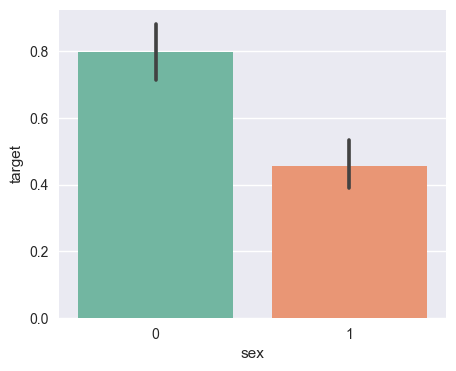

In [1703]:
plt.figure(figsize=(5,4))
sns.barplot(df,x='sex',y='target',palette='Set2')
plt.show()
# The 'sex' feature appears to influence the target variable,
# so it will be retained in the dataset.

### **5.2. cp vs Target**


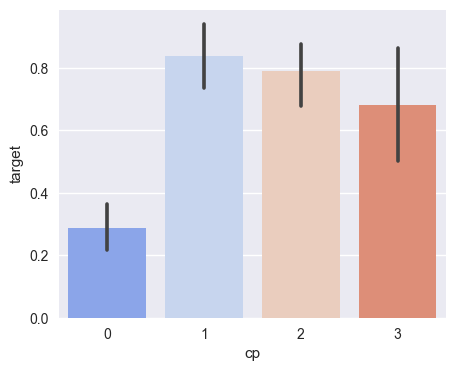

In [1704]:
plt.figure(figsize=(5,4))
sns.barplot(df,x='cp',y='target',palette='coolwarm')
plt.show()

### **5.3. restecg vs Target**


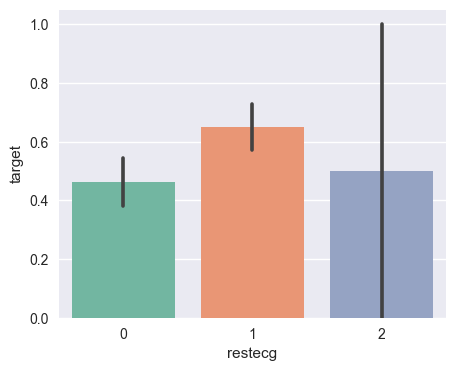

In [1705]:
plt.figure(figsize=(5,4))
sns.barplot(df,x='restecg',y='target',palette='Set2')
plt.show()


### **5.4. exang vs Target**


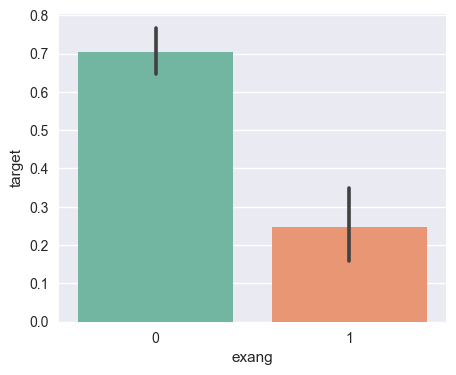

In [1706]:
plt.figure(figsize=(5,4))
sns.barplot(df,x='exang',y='target',palette='Set2')
plt.show()


### **5.5. slope vs Target**


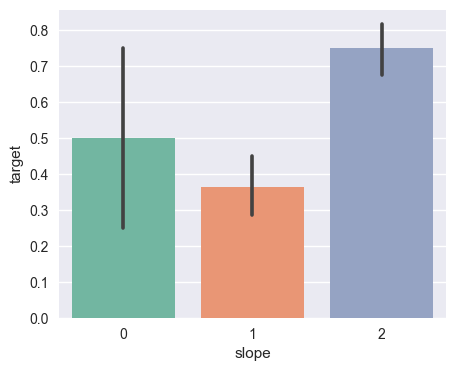

In [1707]:
plt.figure(figsize=(5,4))
sns.barplot(df,x='slope',y='target',palette='Set2')
plt.show()


### **5.6. ca vs Target**


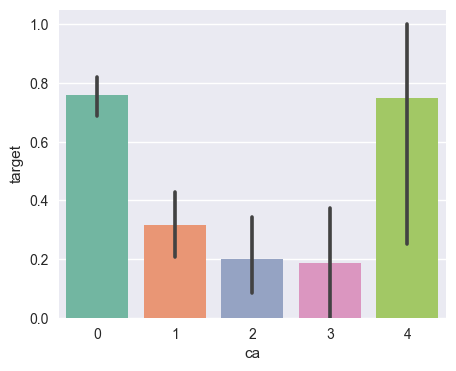

In [1708]:
plt.figure(figsize=(5,4))
sns.barplot(df,x='ca',y='target',palette='Set2')
plt.show()


### **5.7. thal vs Target**


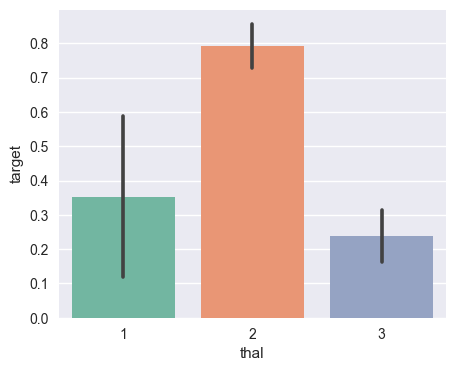

In [1709]:
plt.figure(figsize=(5,4))
sns.barplot(df,x='thal',y='target',palette='Set2')
plt.show()


### **5.8. fbs vs Target**


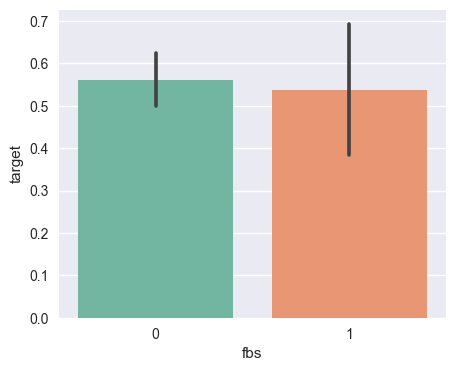

In [1710]:
plt.figure(figsize=(5,4))
sns.barplot(df,x='fbs',y='target',palette='Set2')
plt.show()
# The bars are very close to each other, indicating that 'fbs' has little to no influence on the target variable.

### **5.9. Target vs Continuous Features**
- If the graphs look similar across the feature values, it means that the feature has little or no influence on the target.


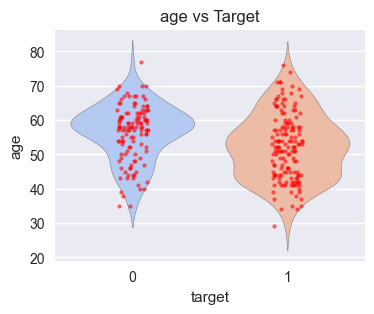

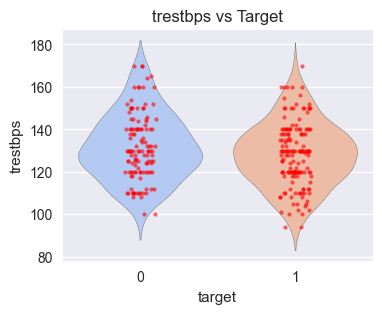

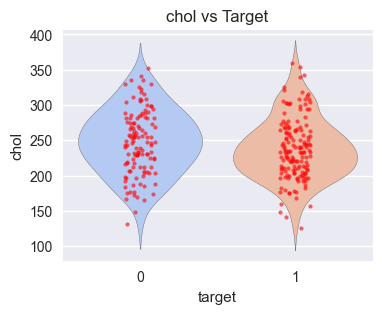

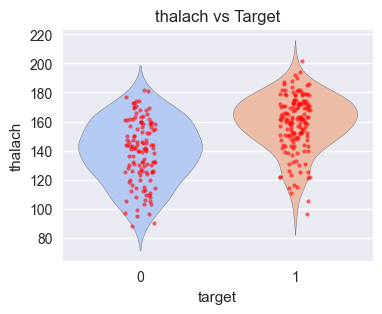

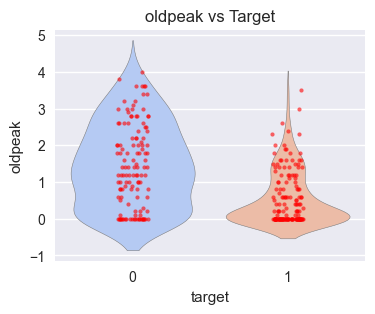

In [1711]:
for i in valeur_numerique:
    plt.figure(figsize=(4,3))
    sns.violinplot(data=df, x='target', y=i, palette='coolwarm', inner=None)
    sns.stripplot(data=df, x='target', y=i, color='red', size=3, jitter=True, alpha=0.6)
    plt.title(f'{i} vs Target')
    plt.show()


### **5.10 Feature Correlation with Target**

In [1712]:
# Checking the correlation of each feature with the target variable
# If the correlation value is close to 0 → little to no influence
# If the correlation value is significantly positive or negative → the feature influences the target
corr = df.corr()['target'].sort_values(ascending=False)
print(corr)


target      1.000000
thalach     0.431910
cp          0.412291
slope       0.322611
restecg     0.179600
fbs        -0.016378
chol       -0.107791
trestbps   -0.116145
age        -0.223788
sex        -0.314173
thal       -0.372947
ca         -0.400493
exang      -0.427156
oldpeak    -0.433242
Name: target, dtype: float64


### **5.11 Feature Selection**

In [1713]:
df=df.drop(['fbs','chol','trestbps'],axis=1)


In [1714]:
df.columns

Index(['age', 'sex', 'cp', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
       'ca', 'thal', 'target'],
      dtype='object')

# **6. Overall Feature Distribution**

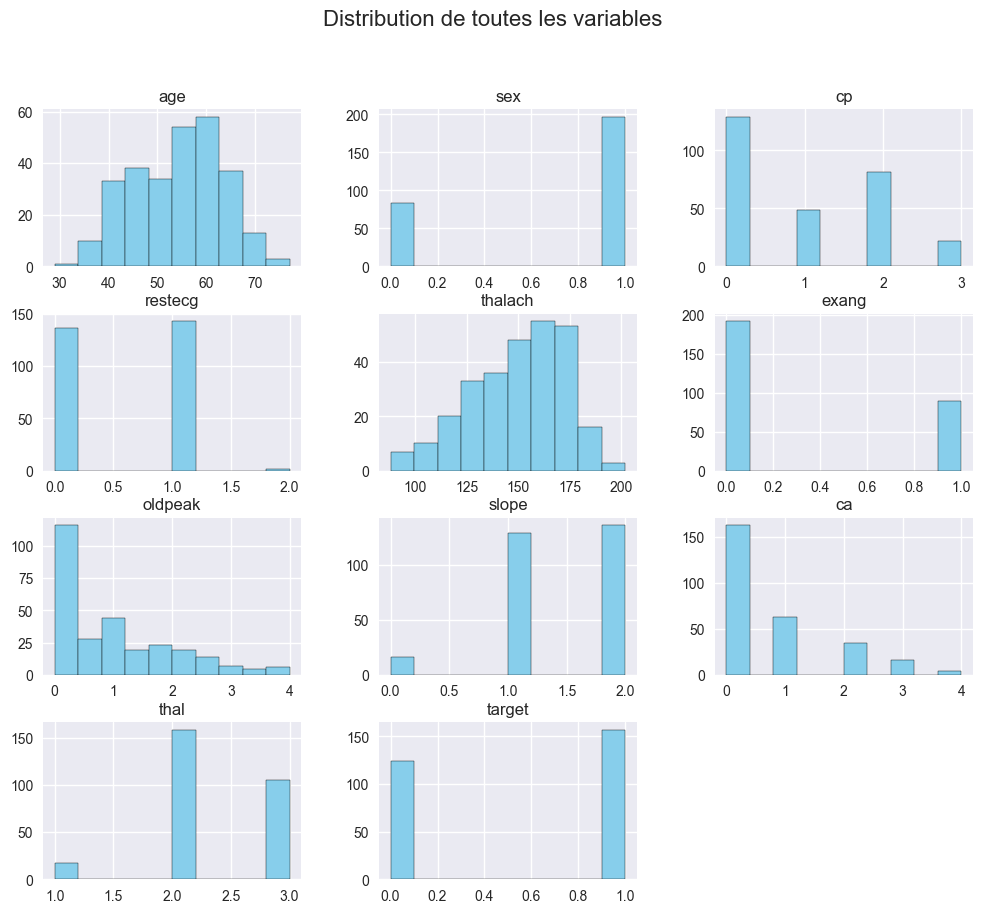

In [1715]:
plt.style.use('seaborn-v0_8')
df.hist(figsize=(12,10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution de toutes les variables", fontsize=16)
plt.show()


# **7. Data Preparation**

### **7.1 Normalization**

In [1716]:
scaler = StandardScaler()
valeur_to_scale= ['thalach','oldpeak','age']
df[valeur_to_scale]=scaler.fit_transform(df[valeur_to_scale])

In [1717]:
df.head()


,age,sex,cp,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.977703,1,3,0,-0.002830,0,1.309934,0,0,1,1
1,-1.865886,1,2,1,1.631952,0,2.478788,0,0,2,1
2,-1.428411,0,1,0,0.969202,0,0.433294,2,0,2,1
3,0.212121,1,1,1,1.234302,0,-0.151133,2,0,2,1
4,0.321490,0,0,1,0.571553,1,-0.345942,2,0,2,1


# **8. Data Splitting**

In [1718]:
X = df.drop('target', axis=1)
y = df['target']


In [1719]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)


In [1720]:
print(X_train.shape,X_test.shape)
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

(224, 10) (57, 10)
target
1    0.558036
0    0.441964
Name: proportion, dtype: float64
target
1    0.561404
0    0.438596
Name: proportion, dtype: float64


# **9. Model Training and Evaluation**

In [1721]:
log = LogisticRegression(random_state=42)
log.fit(X_train, y_train)
log_pred = log.predict(X_test)

print("Logistic Regression")
print("Accuracy :", accuracy_score(y_test, log_pred))
print("Confusion Matrix :\n", confusion_matrix(y_test, log_pred))
print("Classification Report :\n", classification_report(y_test, log_pred))

xgbc = XGBClassifier(random_state=42)
xgbc.fit(X_train, y_train)
xgbc_pred = xgbc.predict(X_test)

print("\nXGBoost Classifier")
print("Accuracy :", accuracy_score(y_test, xgbc_pred))
print("Confusion Matrix :\n", confusion_matrix(y_test, xgbc_pred))
print("Classification Report :\n", classification_report(y_test, xgbc_pred))

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

print("\nDecision Tree")
print("Accuracy :", accuracy_score(y_test, tree_pred))
print("Confusion Matrix :\n", confusion_matrix(y_test, tree_pred))
print("Classification Report :\n", classification_report(y_test, tree_pred))


forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)

print("\nRandom Forest")
print("Accuracy :", accuracy_score(y_test, forest_pred))
print("Confusion Matrix :\n", confusion_matrix(y_test, forest_pred))
print("Classification Report :\n", classification_report(y_test, forest_pred))









Logistic Regression
Accuracy : 0.8421052631578947
Confusion Matrix :
 [[18  7]
 [ 2 30]]
Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.72      0.80        25
           1       0.81      0.94      0.87        32

    accuracy                           0.84        57
   macro avg       0.86      0.83      0.83        57
weighted avg       0.85      0.84      0.84        57


XGBoost Classifier
Accuracy : 0.8245614035087719
Confusion Matrix :
 [[19  6]
 [ 4 28]]
Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.76      0.79        25
           1       0.82      0.88      0.85        32

    accuracy                           0.82        57
   macro avg       0.82      0.82      0.82        57
weighted avg       0.82      0.82      0.82        57


Decision Tree
Accuracy : 0.7719298245614035
Confusion Matrix :
 [[21  4]
 [ 9 23]]
Classification Report :
          

# **11. Hyperparameter Tuning**


In [1722]:
log_model = LogisticRegression(max_iter=1000, random_state=42)


log_params = {
    'penalty': ['l1', 'l2', 'elasticnet', None],   
    'C': [0.001, 0.01, 0.1, 1, 10, 100],          
    'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg'],  
    'class_weight': [None, 'balanced']             
}


log_grid = GridSearchCV(log_model, param_grid=log_params, cv=5, scoring='accuracy', n_jobs=-1)
log_grid.fit(X_train, y_train)


best_log = log_grid.best_estimator_


y_pred_log = best_log.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)


print("Logistic Regression Optimisée :")
print("Meilleurs paramètres :", log_grid.best_params_)
print(f"Score de validation croisée : {log_grid.best_score_:.3f}")
print(f"Accuracy sur le test : {accuracy_log:.3f}")
print("Classification Report :\n", classification_report(y_test, y_pred_log))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_log))


Logistic Regression Optimisée :
Meilleurs paramètres : {'C': 1, 'class_weight': None, 'penalty': 'l2', 'solver': 'saga'}
Score de validation croisée : 0.843
Accuracy sur le test : 0.842
Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.72      0.80        25
           1       0.81      0.94      0.87        32

    accuracy                           0.84        57
   macro avg       0.86      0.83      0.83        57
weighted avg       0.85      0.84      0.84        57

Matrice de confusion :
 [[18  7]
 [ 2 30]]
